In [2]:
import pandas as pd

In [3]:
advertising = pd.read_csv('TvMarketing.csv')

In [4]:
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [6]:
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [7]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [8]:
advertising.shape

(200, 2)

In [9]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [11]:
import seaborn as sns

#to visualize in the notebook
%matplotlib inline

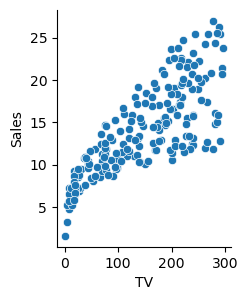

In [40]:
#visualization of the relation between the features and the response (using scatterplots)
sns.pairplot(advertising, x_vars=['TV'], y_vars='Sales', height=3, aspect=0.8, kind='scatter')

In [21]:
#We are going to use sklearn to build the model
# First we define the variable X
x=advertising['TV']
x.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [22]:
# Now we define Y
y=advertising['Sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [23]:
# we split the data into train and test data, with the size of the train data being 70% of the data
# and the test data  the 30% of the whole data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, train_size=0.7, random_state=100)

In [25]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [28]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


In [33]:
# we convert the x data sets on a 2d sets so they can be processed it will say that those sets have 1 column 
# and 140 or 60 rows depending on the case , meanwhile the y values stay as a one dimention data set 
import numpy as np

x_train= np.array(x_train)
x_test= np.array(x_test)
#x_train=x_train[:,np.newaxis]
#x_test=x_test[:,np.newaxis]


In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [36]:
#Now let's perform linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
#we fit the model with the train data
lr.fit(x_train, y_train)


LinearRegression()

In [37]:
#coeficients calculation C and M on the original equation  y= C+M X TV
print(lr.intercept_)
print(lr.coef_)


6.989665857411679
[0.04649736]


In [41]:
#Checkout predictions, we are trying to predict sales (y) so we use the x axis as an input
y_pred=lr.predict(x_test)

In [42]:
type(y_pred)

numpy.ndarray

Text(0.5, 0, 'Sales')

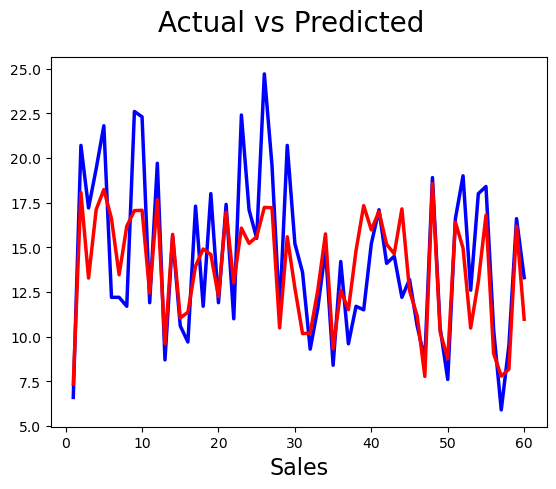

In [43]:
#now we plot the data and compare the actual values with the predicted values

import matplotlib.pyplot as plt
c=[i for i in range(1,61,1)] #generate index
fig=plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Actual vs Predicted', fontsize=20)  #header plot
plt.xlabel('Index', fontsize=18) #X label plot
plt.xlabel('Sales', fontsize=16)#Y label plot


Text(0.5, 0, 'y_test-y_pred')

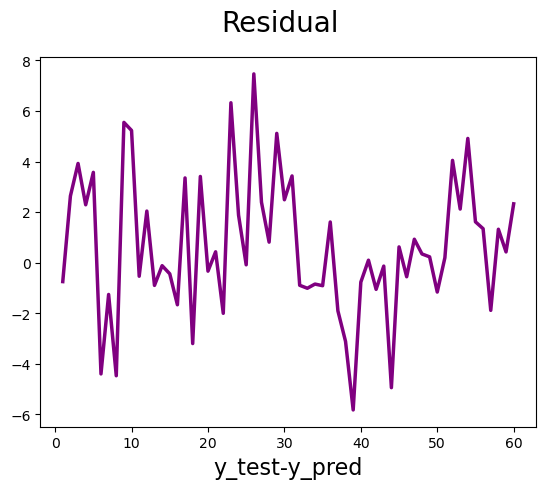

In [53]:
#Residual calculation
c=[i for i in range(1,61,1)] #generate index
fig=plt.figure()
plt.plot(c,y_test-y_pred, color="purple", linewidth=2.5, linestyle="-")
fig.suptitle('Residual', fontsize=20)  #header plot
plt.xlabel('Index', fontsize=18) #X label plot
plt.xlabel('y_test-y_pred', fontsize=16)#Y label plot


In [47]:
from sklearn.metrics import mean_squared_error, r2_score
mse =mean_squared_error(y_test, y_pred)

In [48]:
r_squared =r2_score(y_test, y_pred)

In [50]:
print('Mean squared error: ',mse) # the model is not able to match this percentage of values (around 7,9% for this example) not bad
print('Squared error: ', r_squared) # the higher the better , in real life it is good to get it around 60% and 70%, for this
#example we got it to 59% , higher percentage is usually not possible, this one is decent¡

Mean squared error:  7.97579853285485
Squared error:  0.5942987267783302


Text(0, 0.5, 'predicted Y')

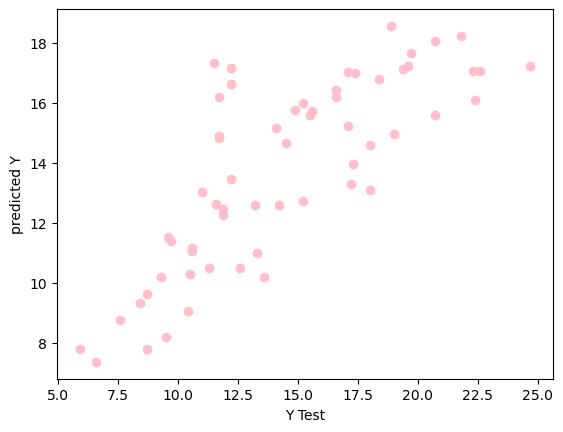

In [52]:
#lets plot the results

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="pink")
plt.xlabel('Y Test')
plt.ylabel('predicted Y')